<a href="https://colab.research.google.com/github/w4bo/AA2425-unibo-mldm/blob/master/slides/lab-05-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

Machine Learning is the science (and art) of programming computers so they can learn from data

> Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed (Arthur Samuel, 1959)

> A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E (Tom Mitchell, 1997)


There are many types of Machine Learning algorithms

Classify them in broad categories, based on the following criteria:

- Whether they are trained with human supervision
    - Supervised, unsupervised, semi-supervised, and reinforcement learning
- Whether they can learn incrementally
    - Online, batch learning
- Whether they compare new to known data points, or detect patterns/models in the training
    - Instance-based, model-based learning


## Sklearn: Machine Learning in Python

- This library is built upon NumPy, SciPy and Matplotlib
    - Open source and commercially usable
- Covers many algorithms
    - Supervised Learning algorithms: Linear Regression, Support Vector Machine, etc.
    - Unsupervised Learning algorithms: clustering, factor analysis, PCA, neural networks, etc.
    - Cross Validation: check the accuracy of supervised models on unseen data
    - Feature extraction: extract the features from data to define the attributes in image and text data


Check also:
- https://scikit-learn.org/stable/index.html
- https://scikit-learn.org/stable/modules/tree.html

In [ ]:
import sklearn as sk
np.random.seed(42)  # why are we fixing the seed?
print(sk.__version__)

1.3.2


## Estimator

- A consistent interface for a wide range of ML applications
- The algorithm that learns from the data (fitting the data) is an estimator
- It can be used with any of the algorithms like classification, regression, and clustering

All the parameters can be set when creating the estimator

```python
estimator = Estimator(param1=1, param2=2)
estimator.param1
```

All estimator objects expose a fit method that takes a dataset

```python
estimator.fit(X)
```

Once data is fitted with an estimator, all the estimated parameters will be the attributes of the estimator object ending by an underscore

```python
estimator.estimated_param_
```

## Sklearn in action

1. Choose a class of model
    - Import the appropriate Estimator class from Scikit-learn (e.g., a decision tree)
1. Choose the model's hyperparameters
1. Model Fitting
    - Fit the model by calling `.fit()` method of the model instance
1. Applying the model to new data
    - For supervised learning, use `.predict()` method to predict the labels for unknown data.
    - For unsupervised learning, use `.predict()` or `.transform()` to infer properties of the data.


## Supervised learning

We focus on supervised learning tasks
- The training set you feed to the algorithm includes the desired solutions
- Classification
    - Approximating a mapping function (`f`) from input variables (`X`) to discrete output variables (`y`)
    - The output variables are called labels or categories
    - The mapping function predicts the class or category for a given observation
    - E.g., a spam filter is trained with many example emails along with their class (`spam` or `ham`)
- Regression
    - Approximating a mapping function (`f`) from input variables (`X`) to a continuous output variable (`y`)
    - A continuous output variable is a real-value, such as an integer or floating-point value
    - E.g., predict the price of a car given a set of features (`mileage`, `age`, `brand`, etc.) called predictors


## Training and test sets

For a supervised learning problem we need:

- Input data along with labels
- Split data between test and training set. How?

Scikit-learn uses data in the form of N-dimensional matrix

- Data as a feature matrix `X` (e.g., a Pandas DataFrame)
    - The samples represent the individual objects described by the dataset (e.g., a `person`)
    - The features describe each sample in a quantitative manner (e.g., `age` and `height`)
- Data as target array `y` (e.g., a Pandas Series)
    - Along with features matrix, we also have the target array (label)


How do we
- distinguish target and feature columns?
- build test and training sets?


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Training and test sets

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
# Split the data into X (features/data) and y (target/labels)
X = df.drop("species", axis=1)
y = df["species"]
# Setup random seed. Why?
np.random.seed(42)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Doing Machine Learning

In [ ]:
# Import the model
from sklearn.tree import DecisionTreeClassifier
# Instantiate and fit the model (on the training set)
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
# Train the model
clf.fit(X_train, y_train)
# Evaluate the model (on the test set)
clf.score(X_test, y_test)

0.9666666666666667

## Showing the model

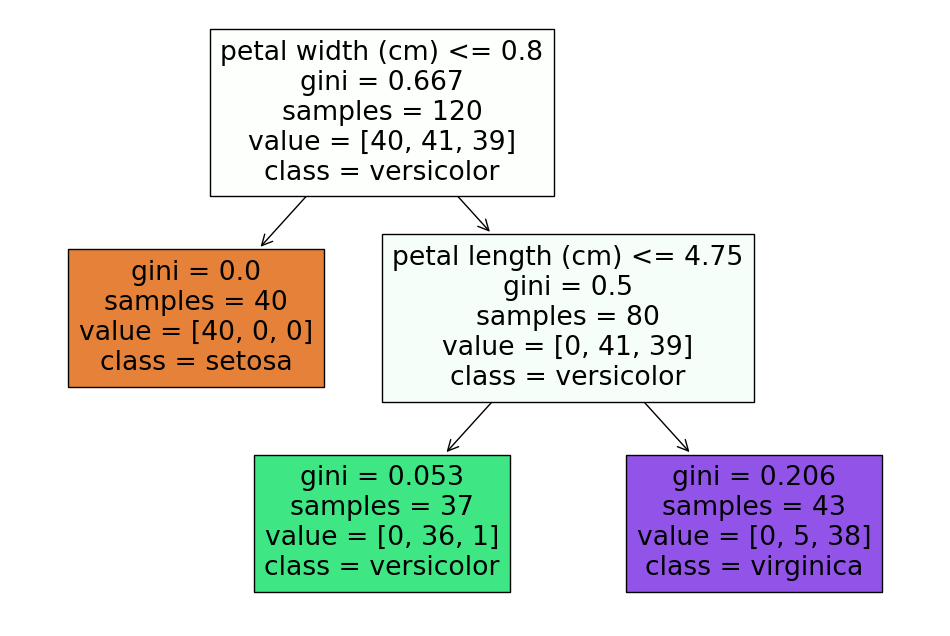

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=df.columns, class_names=['setosa', 'versicolor', 'virginica'], filled=True);

# Check the relevant features

In [ ]:
# Feature importance
feature_importance = clf.feature_importances_
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
# Display the feature importance
feature_importance_df

,Feature,Importance
3,petal width (cm),0.605731
2,petal length (cm),0.394269
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000


## Feature importance: petal length and petal witdth

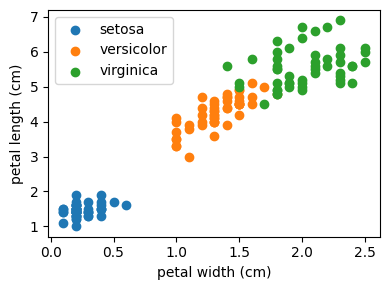

In [ ]:
# Get the two features with the highest importance
def plot(df, model, features):
  # Create a scatter plot
  plt.figure(figsize=(4, 3))
  for x in df["species"].unique():
      plt.scatter(df[df["species"] == x][features[0]], df[df["species"] == x][features[1]], label=x)
  plt.xlabel(features[0])
  plt.ylabel(features[1])
  plt.legend()
  plt.tight_layout()
  plt.show()


plot(df, clf, feature_importance_df['Feature'].iloc[:2].tolist())

## Feature importance: sepal length and sepal witdth

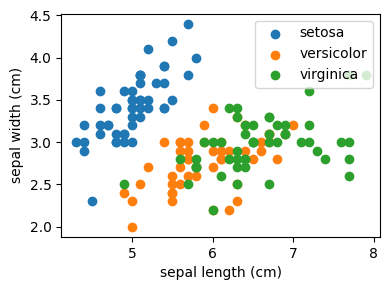

In [ ]:
plot(df, clf, feature_importance_df['Feature'].iloc[2:].tolist())

## Feature importance: PCA

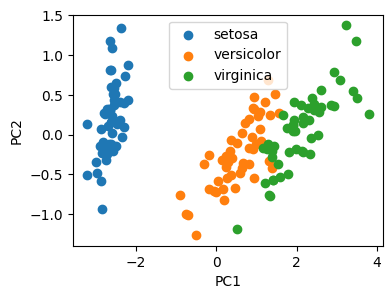

In [ ]:
from sklearn.decomposition import PCA
# Create a PCA object with 2 components
pca = PCA(n_components=2)
# Fit and transform the data using PCA
X_pca = pca.fit_transform(X)
# Create a new DataFrame with the PCA components
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y
# Create a scatter plot
plt.figure(figsize=(4, 3))
for x in df_pca["species"].unique():
    plt.scatter(df_pca[df_pca["species"] == x]['PC1'], df_pca[df_pca["species"] == x]['PC2'], label=x)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()


In [ ]:
pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.361387,-0.084523,0.856671,0.358289
PC2,0.656589,0.730161,-0.173373,-0.075481
